In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data='/content/drive/MyDrive/dataset/car_evaluation.csv'

In [4]:
df=pd.read_csv(data,header=None)

In [5]:
df.shape

(1728, 7)

In [6]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
col_names = ['buying','maint','doors','persons','lug boot','safety','class']
df.columns=col_names

In [8]:
col_names

['buying', 'maint', 'doors', 'persons', 'lug boot', 'safety', 'class']

In [9]:
for col in col_names:
  print(df[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
df

,buying,maint,doors,persons,lug boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [12]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [13]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug boot    0
safety      0
class       0
dtype: int64

In [14]:
X=df.drop(['class'],axis=1)
y=df['class']

In [15]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.10,random_state=42)


In [17]:
X_train.shape,X_test.shape

((1555, 6), (173, 6))

In [18]:
!pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 643.9 kB/s eta 0:00:00


In [19]:
import category_encoders as ce

In [20]:
df.head()

,buying,maint,doors,persons,lug boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [21]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
#GridSEarchCV


In [24]:
#Gini
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)


In [25]:
#fit the model
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

In [26]:
y_pred_gini = clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'.
      format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7572


[Text(0.5125, 0.9, 'x[5] <= 1.5\ngini = 0.451\nsamples = 1555\nvalue = [340, 62, 1098, 55]'),
 Text(0.275, 0.7, 'x[3] <= 2.5\ngini = 0.625\nsamples = 512\nvalue = [187, 26, 244, 55]'),
 Text(0.15, 0.5, 'x[3] <= 1.5\ngini = 0.529\nsamples = 339\nvalue = [89, 9, 213, 28]'),
 Text(0.1, 0.3, 'x[0] <= 2.5\ngini = 0.629\nsamples = 170\nvalue = [89, 9, 44, 28]'),
 Text(0.05, 0.1, 'gini = 0.487\nsamples = 86\nvalue = [50, 0, 36, 0]'),
 Text(0.15, 0.1, 'gini = 0.653\nsamples = 84\nvalue = [39, 9, 8, 28]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 169\nvalue = [0, 0, 169, 0]'),
 Text(0.4, 0.5, 'x[0] <= 2.5\ngini = 0.613\nsamples = 173\nvalue = [98, 17, 31, 27]'),
 Text(0.3, 0.3, 'x[1] <= 2.5\ngini = 0.459\nsamples = 87\nvalue = [56, 0, 31, 0]'),
 Text(0.25, 0.1, 'gini = 0.369\nsamples = 41\nvalue = [10, 0, 31, 0]'),
 Text(0.35, 0.1, 'gini = 0.0\nsamples = 46\nvalue = [46, 0, 0, 0]'),
 Text(0.5, 0.3, 'x[1] <= 2.5\ngini = 0.624\nsamples = 86\nvalue = [42, 17, 0, 27]'),
 Text(0.45, 0.1, 'gini = 0.227

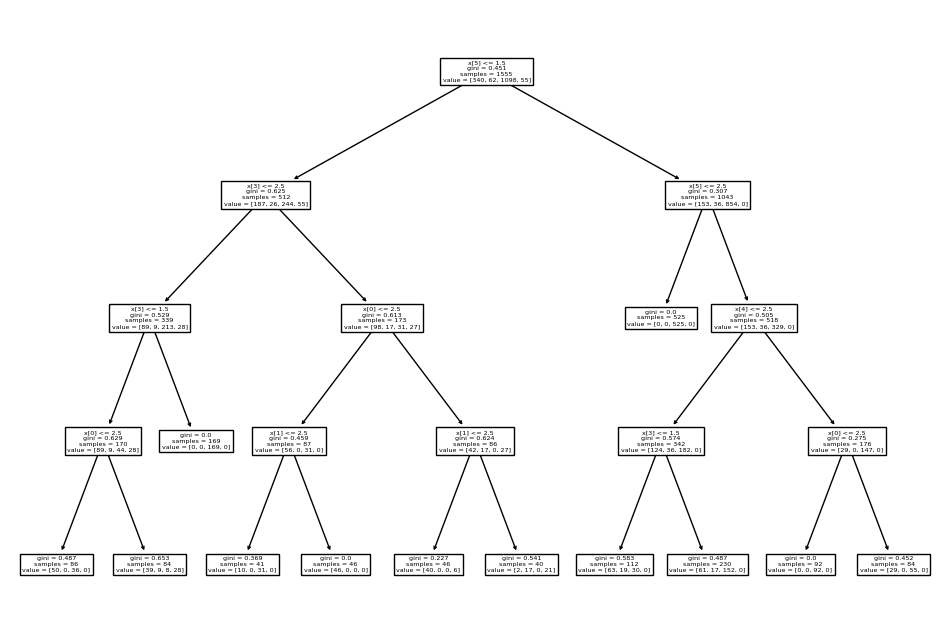

In [27]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

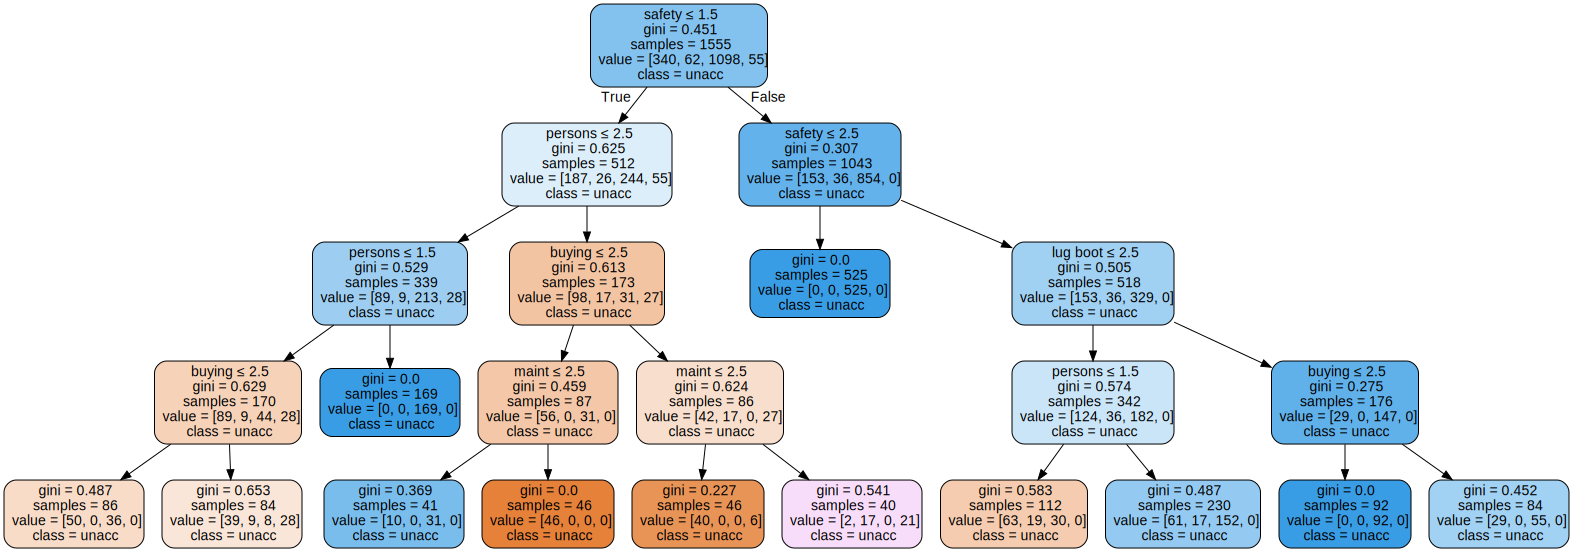

In [28]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [29]:
#Entropy

# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [30]:
y_pred_en = clf_en.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'.
      format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9538


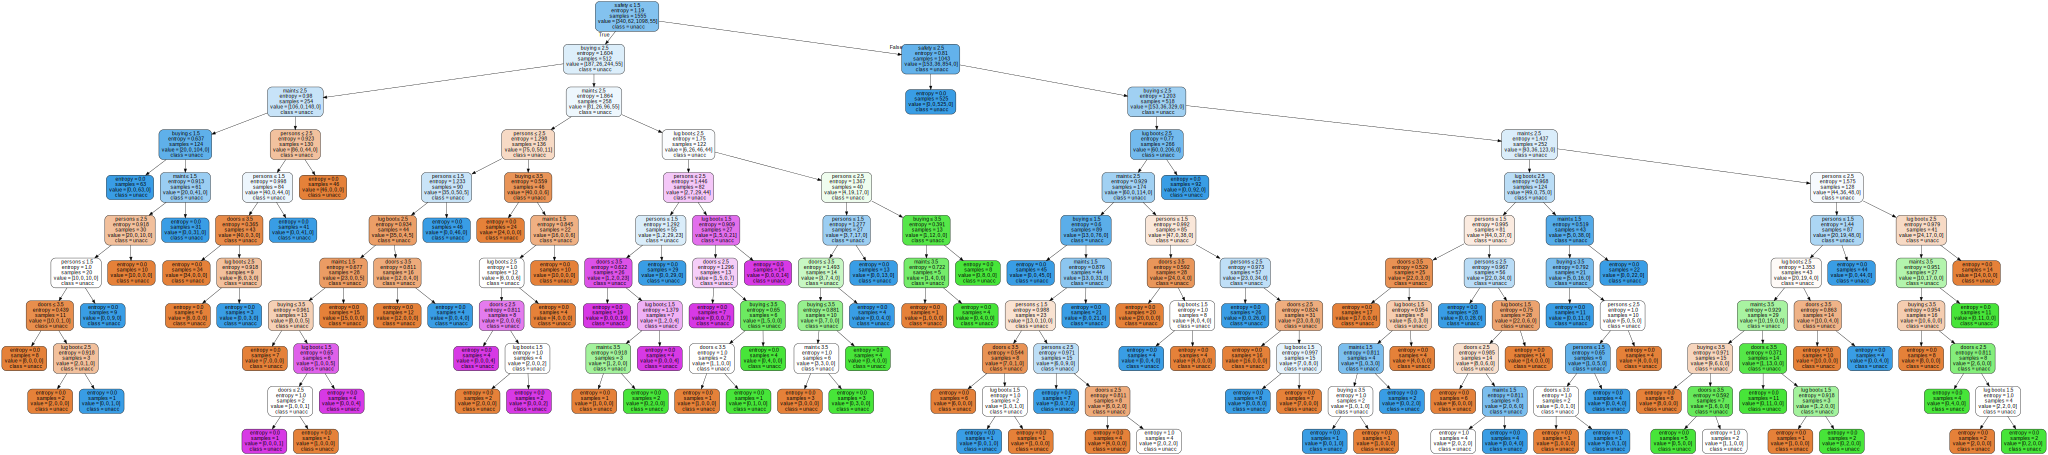

In [32]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                                feature_names=X_train.columns,
                                class_names=y_train,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [33]:
#hyperparameters range for tuning

from sklearn.model_selection import GridSearchCV

param_grid = {'max_features':['auto','sqrt','log2'],
              'ccp_alpha':[0.1,.01,.001],
              'max_depth':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26],
              'criterion':['gini','entropy']
              }

In [34]:
grid_search = GridSearchCV(estimator=clf_en, param_grid=param_grid, cv=5, verbose=True)


In [35]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 396 candidates, totalling 1980 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                              random_state=42),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                       26],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [36]:
tunnig_model=GridSearchCV(clf_en,param_grid=param_grid,scoring='accuracy',cv=5,verbose=True)

In [37]:
final_model=grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=12,
                       max_features='auto', random_state=42)

In [38]:
#Training the model
tree_clas = DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='entropy',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=0, splitter='best')
clf_en.fit(X_train, y_train)
y_predict = clf_en.predict(X_test)

In [39]:
print('Model accuracy score with hyper parameter tuning ',accuracy_score(y_test, y_predict))

Model accuracy score with hyper parameter tuning  0.953757225433526


In [40]:
import pickle
#specify the filename for the picklde file
filename='decision_tree_model.pkl'

#save the model to the pickle file
with open(filename,'wb') as file:
  pickle.dump(clf_en,file)

In [41]:
import pickle

#load the model from the pickle file
with open('decision_tree_model.pkl', 'rb') as file:
  loaded_model = pickle.load(file)

# # Make predictions on new data
# new_data = [[feature1, feature2, ...]]  # Replace with your new data
# predictions = loaded_model.predict(new_data)

# 'predictions' now contains the predicted labels for the new data